<a href="https://colab.research.google.com/github/JesseK18/Cogntive_Neuroscience/blob/main/start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding for COGNEURO


In [3]:
! conda install -c conda-forge tensorflow
!pip install snntorch


/bin/bash: line 1: conda: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 11.5 MB/s eta 0:00:00


In [4]:
# Importing used packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import snntorch as snn
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim



# Loading external data


In [5]:

digits_X = np.load('digits_X.npy')
digits_y = np.load('digits_y.npy')

# Print the first few rows to confirm the data
print(digits_X[:5])  # For large arrays, show only the first 5 rows
print(digits_y[:5])

# Reshape the feature matrix to 2D
digits_X_reshaped = digits_X.reshape(digits_X.shape[0], -1)

# Convert to DataFrame
df_X = pd.DataFrame(digits_X_reshaped)
df_y = pd.DataFrame(digits_y, columns=['Label'])
print("Shape of df_X:", df_X.shape)
print("Shape of df_y:", df_y.shape)
print(df_X.head(20))  # First 5 rows of the feature matrix

print(df_y.head(20))  # First 5 labels


FileNotFoundError: [Errno 2] No such file or directory: 'digits_X.npy'

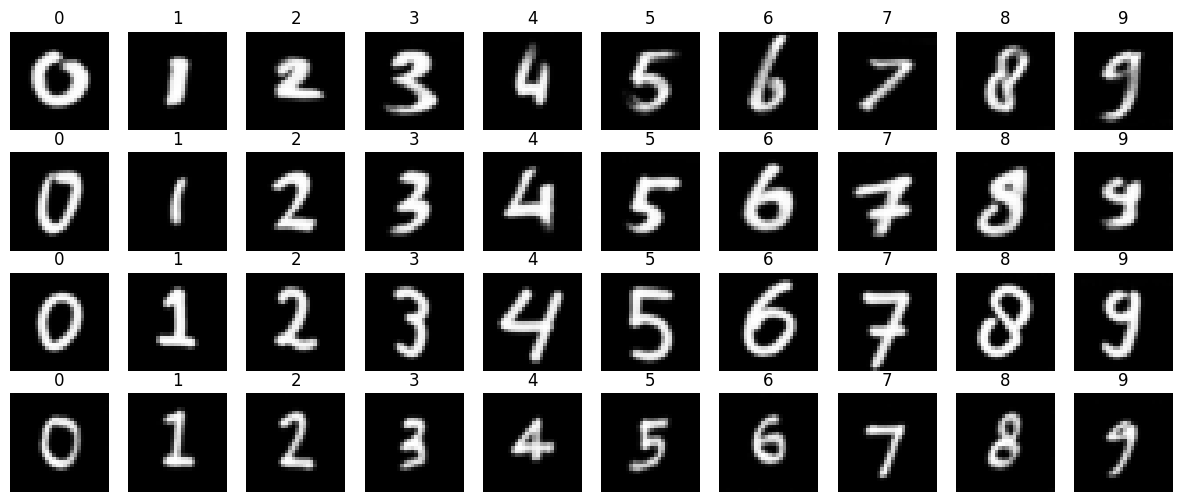

In [7]:

# load. Ensure you get the path correct -- this code assumes the files are in the working directory
X_test2 = np.load('./digits_X.npy')
y_test2 = np.load('./digits_y.npy')

# plot to see if loaded correctly
f, ax = plt.subplots(4,10, figsize=(15,6))
ax = ax.ravel()
for i in range(40):
    ax[i].imshow(X_test2[i,:,:], cmap='Greys_r')
    ax[i].set_title(y_test2[i])
    ax[i].axis('off')

# Creating 3 models accroding to the workgroup demands

In [9]:
"""Create the three models described in the report"""
# Define the model
model_1_hidden = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),  # 1 hidden layer with 128 nodes
    Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
])

# Compile the model
model_1_hidden.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_1_hidden.summary()


# Define the model
model_3_hidden = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),  # 1st hidden layer with 128 nodes
    Dense(64, activation='relu'),   # 2nd hidden layer with 64 nodes
    Dense(32, activation='relu'),   # 3rd hidden layer with 32 nodes
    Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
])

# Compile the model
model_3_hidden.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_3_hidden.summary()


# Define the model
model_1_conv = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 1 convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Flatten(),
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
])

# Compile the model
model_1_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_1_conv.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

# Training the CNN on the MNIST and external dataset with the convolutional network

In [11]:
"""Train the CNN on the MNIST and test/ evaluate the model to check how accurate it is"""
np.random.seed(42)
#Load the external dataset

X_test2 = np.load('./digits_X.npy')
y_test2 = np.load('./digits_y.npy')

# Normalize and reshape the external validation dataset
X_test2 = X_test2 / 255.0
X_test2 = X_test2.reshape(-1, 28, 28, 1)


# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the data for convolutional networks
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train the models
history_1 = model_1_conv.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
history_2 = model_1_hidden.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
history_3 = model_3_hidden.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Plot the accs for the 3 models
final_train_accuracy_1 = history_1.history['accuracy'][-1]
final_val_accuracy_1 = history_1.history['val_accuracy'][-1]
external_test_loss_1, external_test_accuracy_1 = model_1_conv.evaluate(X_test2, y_test2, verbose=0)

final_train_accuracy_2 = history_2.history['accuracy'][-1]
final_val_accuracy_2 = history_2.history['val_accuracy'][-1]
external_test_loss_2, external_test_accuracy_2 = model_1_hidden.evaluate(X_test2, y_test2, verbose=0)

final_train_accuracy_3 = history_3.history['accuracy'][-1]
final_val_accuracy_3 = history_3.history['val_accuracy'][-1]
external_test_loss_3, external_test_accuracy_3 = model_3_hidden.evaluate(X_test2, y_test2, verbose=0)

# Print results in a structured way
print(f"{'Model':<15}{'Train Acc':<15}{'Val Acc':<15}{'External Test Acc':<20}")
print(f"{'-'*65}")
print(f"{'model_1_conv':<15}{final_train_accuracy_1:<15.4f}{final_val_accuracy_1:<15.4f}{external_test_accuracy_1:<20.4f}")
print(f"{'model_1_hidden':<15}{final_train_accuracy_2:<15.4f}{final_val_accuracy_2:<15.4f}{external_test_accuracy_2:<20.4f}")
print(f"{'model_3_hidden':<15}{final_train_accuracy_3:<15.4f}{final_val_accuracy_3:<15.4f}{external_test_accuracy_3:<20.4f}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9880 - val_loss: 0.0413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9867 - val_loss: 0.0476
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9982 - loss: 0.0051 - val_accuracy: 0.9840 - val_loss: 0.0624
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9980 - loss: 0.0056 - val_accuracy: 0.9870 - val_loss: 0.0548
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9863 - val_loss: 0.0579
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0326 - val_accuracy: 0.9764 - val_loss: 0.0793
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9774 - val_loss: 0.0741
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0210 - val_accu

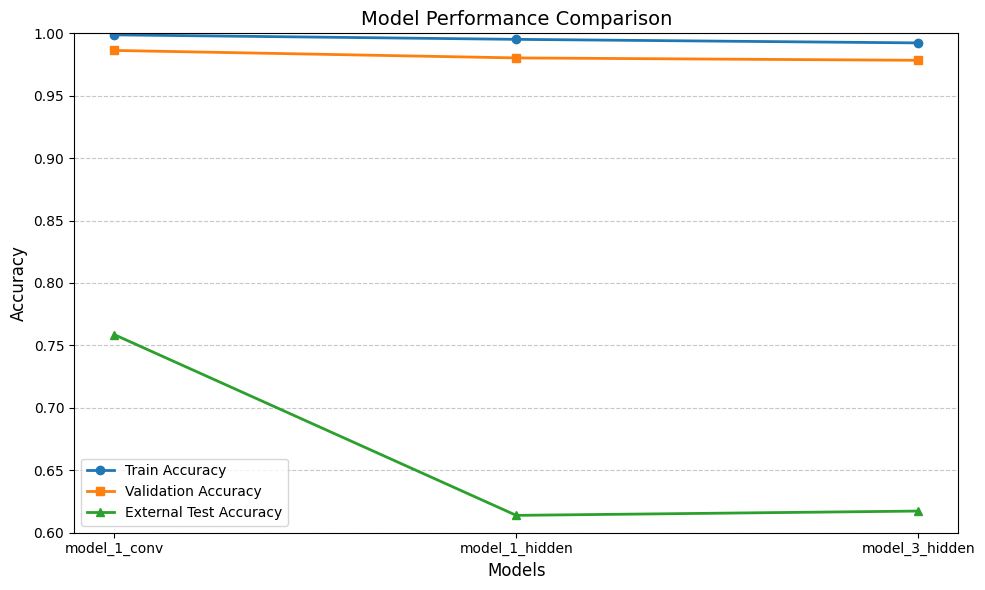

In [14]:
# group data together
models = ['model_1_conv', 'model_1_hidden', 'model_3_hidden']
train_accuracies = [final_train_accuracy_1, final_train_accuracy_2, final_train_accuracy_3]
val_accuracies = [final_val_accuracy_1, final_val_accuracy_2, final_val_accuracy_3]
external_test_accuracies = [external_test_accuracy_1, external_test_accuracy_2, external_test_accuracy_3]

# Plot the accuracies using a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(models, val_accuracies, marker='s',label='Validation Accuracy', linewidth=2)
plt.plot(models, external_test_accuracies, marker='^', label='External Test Accuracy', linewidth=2)

# Nitty gritty
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.ylim(0.6, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
"""Comparing size of datasets to check if comparison is reasonable or our dataset is to small"""

import numpy as np

# Load the external dataset
digits_X = np.load('digits_X.npy')
digits_y = np.load('digits_y.npy')

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Number of digits in the external dataset
num_digits_external = digits_X.shape[0]
print(f"Number of digits in the external dataset: {num_digits_external}")

# Number of digits in the MNIST dataset
num_digits_mnist = X_train.shape[0] + X_test.shape[0]
print(f"Number of digits in the MNIST dataset: {num_digits_mnist}")

Number of digits in the external dataset: 290
Number of digits in the MNIST dataset: 70000


In [1]:
"""Loading data set in mnist. training on mnist only and evaluating/testing on both mnist and our dataset"""
"""I dont know why but here I am creating a new model instead of using the other one, nice to have, but yeah..."""

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the training and testing data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data for fully connected networks
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Load external validation dataset
X_test2 = np.load('./digits_X.npy')
y_test2 = np.load('./digits_y.npy')

# Normalize and reshape the external validation dataset
X_test2 = X_test2 / 255.0
X_test2 = X_test2.reshape(-1, 28 * 28)

# Define a function to create the model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28 * 28,)),  # Flatten the input
        Dense(128, activation='relu'),   # First dense layer with 128 nodes
        Dropout(0.2),                    # Dropout regularization to prevent overfitting
        Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
    ])
    model.compile(
        optimizer=Adam(),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,  # No horizontal flips for digit classification
    fill_mode='nearest'
)

# Fit the data augmentation generator to the training data
datagen.fit(X_train.reshape(-1, 28, 28, 1))  # Reshape to match expected 4D input for data augmentation

# Example: Train a convolutional model (assuming `model_1_conv` is predefined)
# model_1_conv.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=32),
#                  epochs=5, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

# Cross-validation with KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_accuracies = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=5, verbose=0)  # Silent training

    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_accuracies.append(val_accuracy)

# Calculate the average validation accuracy
average_val_accuracy = np.mean(val_accuracies)
print(f'Average Validation Accuracy: {average_val_accuracy:.4f}')

# Final model training on full dataset
final_model = create_model()
history = final_model.fit(X_train, y_train, epochs=5, verbose=1)

# Evaluate on the external validation dataset
test_loss, test_accuracy = final_model.evaluate(X_test2, y_test2, verbose=1)
print(f'Test Accuracy on External Validation Dataset: {test_accuracy:.4f}')

history.display()

# plt.figure(figsize=(8, 6))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()


NameError: name 'mnist' is not defined

In [ ]:
"""SNN trained and fitted to evaluate accuracy on mnist"""

# Define the Spiking Neural Network (SNN) model and
class SpikingMNISTClassifier(nn.Module):
    def __init__(self, timesteps):
        super().__init__()
        self.timesteps = timesteps
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.lif1 = snn.Leaky(beta=0.9)  # Use biologically plausible LIF neuron
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.lif2 = snn.Leaky(beta=0.9)
        self.fc1 = None  # Will be dynamically set
        self.lif3 = snn.Leaky(beta=0.9)
        self.fc2 = nn.Linear(128, 10)
        self.lif4 = snn.Leaky(beta=0.9)  # Output layer with LIF neurons

    def forward(self, x):
        # Initialize hidden states
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        mem3 = self.lif3.init_leaky()
        mem4 = self.lif4.init_leaky()

        spk_rec = []
        for t in range(self.timesteps):
            cur1 = self.conv1(x)
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.conv2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur2 = torch.flatten(spk2, 1)  # Flatten the output of conv layers
            cur3 = self.fc1(cur2)          # Apply dynamically set fully connected layer
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc2(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)
            spk_rec.append(spk4)

        return torch.stack(spk_rec, dim=0).sum(dim=0)  # Sum spikes over time

    def set_fc1_input_size(self, input_size):
        """Dynamically set fc1 input size based on flattened output from conv2."""
        self.fc1 = nn.Linear(input_size, 128)


# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST data
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Model initialization and training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
timesteps = 10  # Simulate for 10 timesteps
model = SpikingMNISTClassifier(timesteps).to(device)

# Dynamically calculate the input size for fc1
dummy_input = torch.zeros(1, 1, 28, 28).to(device)  # Example input
with torch.no_grad():
    conv_output = model.conv2(model.lif1(model.conv1(dummy_input))[0])
    flattened_size = torch.flatten(conv_output, 1).shape[1]
    model.set_fc1_input_size(flattened_size)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Training loop with device consistency checks
epochs = 5
for epoch in range(epochs):
    for data, targets in train_loader:
        # Move data and targets to the same device as the model
        data, targets = data.to(device), targets.to(device)
        # Ensure model is on the correct device
        model.to(device)
        optimizer.zero_grad()
        output = model(data)  # Model output
        loss = loss_fn(output, targets)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

# Test loop
correct = 0
total = 0
with torch.no_grad():
    for data, targets in test_loader:
        # Move test data and targets to the same device as the model
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)  # Model predictions
        _, predicted = torch.max(outputs.data, 1)  # Predicted classes
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print('Test Accuracy: {:.2f}%'.format(100 * correct / total))





Epoch: 1, Loss: 0.1765
Epoch: 2, Loss: 0.1339
Epoch: 3, Loss: 0.0031
Epoch: 4, Loss: 0.0038
Epoch: 5, Loss: 0.0017
Test Accuracy: 98.44%


In [ ]:
# Test loop
correct = 0
total = 0
with torch.no_grad():
    for data, targets in X_test2:
        # Move test data and targets to the same device as the model
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)  # Model predictions
        _, predicted = torch.max(outputs.data, 1)  # Predicted classes
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print('Test Accuracy: {:.2f}%'.format(100 * correct / total))

In [ ]:
#training the model on mnist and then checking how accurate it is on our dataset

# Define the Spiking Neural Network (SNN) model
class SpikingMNISTClassifier(nn.Module):
    def __init__(self, timesteps):
        super().__init__()
        self.timesteps = timesteps
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.lif1 = snn.Leaky(beta=0.9)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.lif2 = snn.Leaky(beta=0.9)
        self.fc1 = None  # Will be dynamically set
        self.lif3 = snn.Leaky(beta=0.9)
        self.fc2 = nn.Linear(128, 10)
        self.lif4 = snn.Leaky(beta=0.9)

    def forward(self, x):
        # Initialize hidden states
        mem1, mem2, mem3, mem4 = self.lif1.init_leaky(), self.lif2.init_leaky(), self.lif3.init_leaky(), self.lif4.init_leaky()
        spk_rec = []
        for t in range(self.timesteps):
            cur1 = self.conv1(x)
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.conv2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur2 = torch.flatten(spk2, 1)  # Flatten output of conv2
            cur3 = self.fc1(cur2)          # Pass through fully connected layer
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc2(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)
            spk_rec.append(spk4)
        return torch.stack(spk_rec, dim=0).sum(dim=0)  # Sum spikes over time

    def set_fc1_input_size(self, input_size):
        """Dynamically set the input size of fc1."""
        self.fc1 = nn.Linear(input_size, 128)

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
timesteps = 10
model = SpikingMNISTClassifier(timesteps).to(device)

# Dynamically calculate and set the input size for fc1
dummy_input = torch.zeros(1, 1, 28, 28).to(device)  # Example input
with torch.no_grad():
    conv_output = model.conv2(model.lif1(model.conv1(dummy_input))[0])
    flattened_size = torch.flatten(conv_output, 1).shape[1]
    model.set_fc1_input_size(flattened_size)

# Save the trained model properly (with fc1 initialized)
torch.save(model.state_dict(), './spiking_mnist_model.pth')

# Load external datasets
X_test2 = torch.Tensor(np.load('./digits_X.npy')).float()
y_test2 = torch.Tensor(np.load('./digits_y.npy')).long()

# Normalize and reshape the external datasets
X_test2 = X_test2 / 255.0
X_test2 = X_test2.unsqueeze(1)  # Add a channel dimension for grayscale images

# Create a DataLoader for the external dataset
test_dataset = TensorDataset(X_test2, y_test2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load the trained model
model = SpikingMNISTClassifier(timesteps=10).to(device)
model.set_fc1_input_size(flattened_size)  # Ensure fc1 is set before loading weights
model.load_state_dict(torch.load('./spiking_mnist_model.pth', map_location=device))
model.eval()
model.to(device)



# Test accuracy on the external dataset
correct, total = 0, 0
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)

        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

# Print the test accuracy
print('Test Accuracy on External Dataset: {:.2f}%'.format(100 * correct / total))



Test Accuracy on External Dataset: 10.00%


<ipython-input-31-31b11c394839>:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./spiking_mnist_model.pth', map_location=device))


In [ ]:
# prompt: Now train the SNN model on the X_test2 = torch.Tensor(np.load('./digits_X.npy')).float()
# y_test2 = torch.Tensor(np.load('./digits_y.npy')).long(). do kfold cross validation and also give the accuracy of teh testing set after training

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import KFold

# Assuming SpikingMNISTClassifier and other necessary components are defined as in the previous code

# Load the external datasets
X_test2 = torch.Tensor(np.load('./digits_X.npy')).float()
y_test2 = torch.Tensor(np.load('./digits_y.npy')).long()

# Normalize and reshape
X_test2 = X_test2 / 255.0
X_test2 = X_test2.unsqueeze(1)

# Create dataset and dataloader for k-fold
dataset = TensorDataset(X_test2, y_test2)

# Define k-fold cross-validation parameters
k_folds = 5
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store results
fold_accuracies = []


# K-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kfold.split(dataset)):
    print(f"Fold {fold + 1}/{k_folds}")

    # Split data into train/test sets for this fold
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    test_subset = torch.utils.data.Subset(dataset, test_idx)
    train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)

    # Initialize model, optimizer, and loss function
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    timesteps = 10  # Number of timesteps for simulation
    model = SpikingMNISTClassifier(timesteps).to(device)

    # Dynamically set input size for fc1 (this part is crucial and needs to be included in your training loop as well)
    dummy_input = torch.zeros(1, 1, 28, 28).to(device)
    with torch.no_grad():
        conv_output = model.conv2(model.lif1(model.conv1(dummy_input))[0])
        flattened_size = torch.flatten(conv_output, 1).shape[1]
        model.set_fc1_input_size(flattened_size)


    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()
    model.to(device)
    # Training loop
    epochs = 5 # You may need to adjust epochs
    for epoch in range(epochs):
      for data, targets in train_loader:
          data, targets = data.to(device), targets.to(device)
          optimizer.zero_grad()
          outputs = model(data)
          loss = loss_fn(outputs, targets)
          loss.backward()
          optimizer.step()

      print(f"Fold {fold+1}, Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

    # Testing loop
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total
    fold_accuracies.append(accuracy)
    print(f"Fold {fold+1} Accuracy: {accuracy:.2f}%")

# Average accuracy over all folds
avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"Average accuracy across all folds: {avg_accuracy:.2f}%")


Fold 1/5
Fold 1, Epoch 1/5, Loss: 2.3026
Fold 1, Epoch 2/5, Loss: 1.5494
Fold 1, Epoch 3/5, Loss: 0.8864
Fold 1, Epoch 4/5, Loss: 0.5661
Fold 1, Epoch 5/5, Loss: 0.3407
Fold 1 Accuracy: 84.48%
Fold 2/5
Fold 2, Epoch 1/5, Loss: 2.3026
Fold 2, Epoch 2/5, Loss: 1.5536
Fold 2, Epoch 3/5, Loss: 0.5884
Fold 2, Epoch 4/5, Loss: 0.3730
Fold 2, Epoch 5/5, Loss: 0.3646
Fold 2 Accuracy: 81.03%
Fold 3/5
Fold 3, Epoch 1/5, Loss: 2.2114
Fold 3, Epoch 2/5, Loss: 1.1399
Fold 3, Epoch 3/5, Loss: 0.6460
Fold 3, Epoch 4/5, Loss: 0.3063
Fold 3, Epoch 5/5, Loss: 0.2396
Fold 3 Accuracy: 70.69%
Fold 4/5
Fold 4, Epoch 1/5, Loss: 2.2745
Fold 4, Epoch 2/5, Loss: 1.1317
Fold 4, Epoch 3/5, Loss: 0.5094
Fold 4, Epoch 4/5, Loss: 0.3189
Fold 4, Epoch 5/5, Loss: 0.1820
Fold 4 Accuracy: 75.86%
Fold 5/5
Fold 5, Epoch 1/5, Loss: 2.1510
Fold 5, Epoch 2/5, Loss: 1.6213
Fold 5, Epoch 3/5, Loss: 1.0362
Fold 5, Epoch 4/5, Loss: 0.7179
Fold 5, Epoch 5/5, Loss: 0.3224
Fold 5 Accuracy: 81.03%
Average accuracy across all folds: 